In [254]:
from elasticsearch import Elasticsearch
import json
import requests

import eslogin

import datetime
import time

import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.ensemble import RandomForestClassifier
import sklearn
import scipy

import plotly.plotly as py
from plotly.graph_objs import *

from itertools import compress

%matplotlib inline
mpl.style.use('ggplot')

pd.options.display.max_rows = 10
pd.options.display.max_columns = 30

#Get data

In [255]:
es = Elasticsearch([{'host': eslogin.host, 'port': eslogin.port}],http_auth=(eslogin.user,eslogin.password))

In [4]:
es.count(index="events-2015.05.*", body={'query': {'bool': {'must':[{'match': { 'et' : 'AD_SHOW' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']

2774993

^That's too much data, even getting 10K each time will take 277 downloads...

In [6]:
columns = [31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,
           93,94,95,99,108,113,115,116,117,119,120,121,122,125,130,131,132,133,
           134,137,139,140,141,142,145]
index = [156, 157, 158, 169, 170, 171, 175, 190, 191, 192, 203, 204,
         205, 213, 214, 215, 216, 217, 218, 220, 221, 222, 225, 226, 227,
         228, 229, 230, 231, 232, 236, 237, 238, 239, 240, 241, 242, 243,
         245, 246, 248, 249, 250, 254, 256, 257, 258, 259, 261, 262, 263,
         264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
         277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
         292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
         305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 318, 319,
         324, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
         339, 340, 341, 342, 343, 344, 346, 349, 350, 353]
df_show_m5 = pd.DataFrame(index=index, columns=columns)
df_show_m5 = df_show_m5.fillna(0)

In [7]:
for col in columns:
    for ind in index:
        df_show_m5.loc[ind,col] = es.count(index="events-2015.05.*", body={'query': {'bool': {'must':[{'match': { 'ai' : col }}, {'match': { 'cr' : ind }}, {'match': { 'et' : 'AD_SHOW' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']

In [8]:
df_show_m5.to_csv("../data/ad_show_count_m5_150617.tab",sep='\t')

In [9]:
df_click_m5 = pd.DataFrame(index=index, columns=columns)
df_click_m5 = df_click_m5.fillna(0)
for col in columns:
    for ind in index:
        df_click_m5.loc[ind,col] = es.count(index="events-2015.05.*", body={'query': {'bool': {'must':[{'match': { 'ai' : col }}, {'match': { 'cr' : ind }}, {'match': { 'et' : 'AD_CLICK' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']

In [10]:
df_click_m5.to_csv("../data/ad_click_count_m5_150617.tab",sep='\t')

In [11]:
df_show_m6 = pd.DataFrame(index=index, columns=columns)
df_show_m6 = df_show_m6.fillna(0)
for col in columns:
    for ind in index:
        df_show_m6.loc[ind,col] = es.count(index="events-2015.06.*", body={'query': {'bool': {'must':[{'match': { 'ai' : col }}, {'match': { 'cr' : ind }}, {'match': { 'et' : 'AD_SHOW' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']

In [13]:
df_show_m6.to_csv("../data/ad_show_count_m6_150617.tab",sep='\t')

In [12]:
df_click_m6 = pd.DataFrame(index=index, columns=columns)
df_click_m6 = df_click_m6.fillna(0)
for col in columns:
    for ind in index:
        df_click_m6.loc[ind,col] = es.count(index="events-2015.06.*", body={'query': {'bool': {'must':[{'match': { 'ai' : col }}, {'match': { 'cr' : ind }}, {'match': { 'et' : 'AD_CLICK' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']

In [14]:
df_click_m6.to_csv("../data/ad_click_count_m6_150617.tab",sep='\t')

In [15]:
df_show = df_show_m5 + df_show_m6
df_click = df_click_m5 + df_click_m6

In [102]:
df_show.to_csv("../data/ad_show_count_150617.tab",sep='\t')
df_click.to_csv("../data/ad_click_count_150617.tab",sep='\t')

In [2]:
df_show = pd.read_csv("../data/ad_show_count_150617.tab",sep='\t',index_col=0,encoding='utf-8')
df_click = pd.read_csv("../data/ad_click_count_150617.tab",sep='\t',index_col=0,encoding='utf-8')

In [3]:
df_ctr = df_click / (df_show + 0.01)

In [4]:
rate = float(df_click.sum().sum()) / df_show.sum().sum()
rate

0.0022219420518531678

In [5]:
df_ctr_lo = np.log2(df_ctr/rate + 0.01)

In [60]:
df_ctr_lo

,31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,93,94,95,99,108,113,115,116,117,119,120,121,
156,-19.931569,0.420131,-19.931569,0.470188,1.330108,-19.931569,-0.005631,-1.504587,0.421604,3.141255,-19.931569,-19.931569,-19.931569,0.992541,2.004760,3.290088,-19.931569,0.062387,1.858324,1.162840,-19.931569,-19.931569,4.564449,0.839521,0.200887,-3.402011,1.070041,1.063076,-19.931569,4.593262,...
157,-19.931569,-0.269832,0.304836,0.242751,-19.931569,1.259349,-0.338457,0.092854,0.434542,-19.931569,2.906832,-19.931569,-19.931569,0.945371,2.322101,-19.931569,-19.931569,-0.125644,1.706610,-19.931569,-19.931569,-19.931569,4.360001,-0.116802,-0.320466,-19.931569,-0.058870,1.041801,-19.931569,4.162776,...
158,-19.931569,-0.324052,-1.331978,-0.801273,1.379294,0.498792,-0.586460,0.927645,-19.931569,3.491674,3.141255,-19.931569,-19.931569,1.031585,1.621438,-19.931569,-19.931569,0.919116,1.712963,-19.931569,-19.931569,-19.931569,4.355073,1.578715,-1.900281,-4.399112,0.603287,0.733133,-19.931569,4.486959,...
169,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,2.387531,-19.931569,-19.931569,-19.931569,-0.008614,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...
170,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-0.049455,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...
171,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,2.127323,-19.931569,-19.931569,-19.931569,0.425222,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...
175,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,15.457819,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...
190,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,1.028831,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,1.379252,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...
191,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,0.914802,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,3.259298,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...
192,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,1.085334,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,-19.931569,...


In [66]:
df_show.loc[203,93]

0

In [57]:
float(df_click.loc[289,67]) / df_show.loc[289,67]

0.015267175572519083

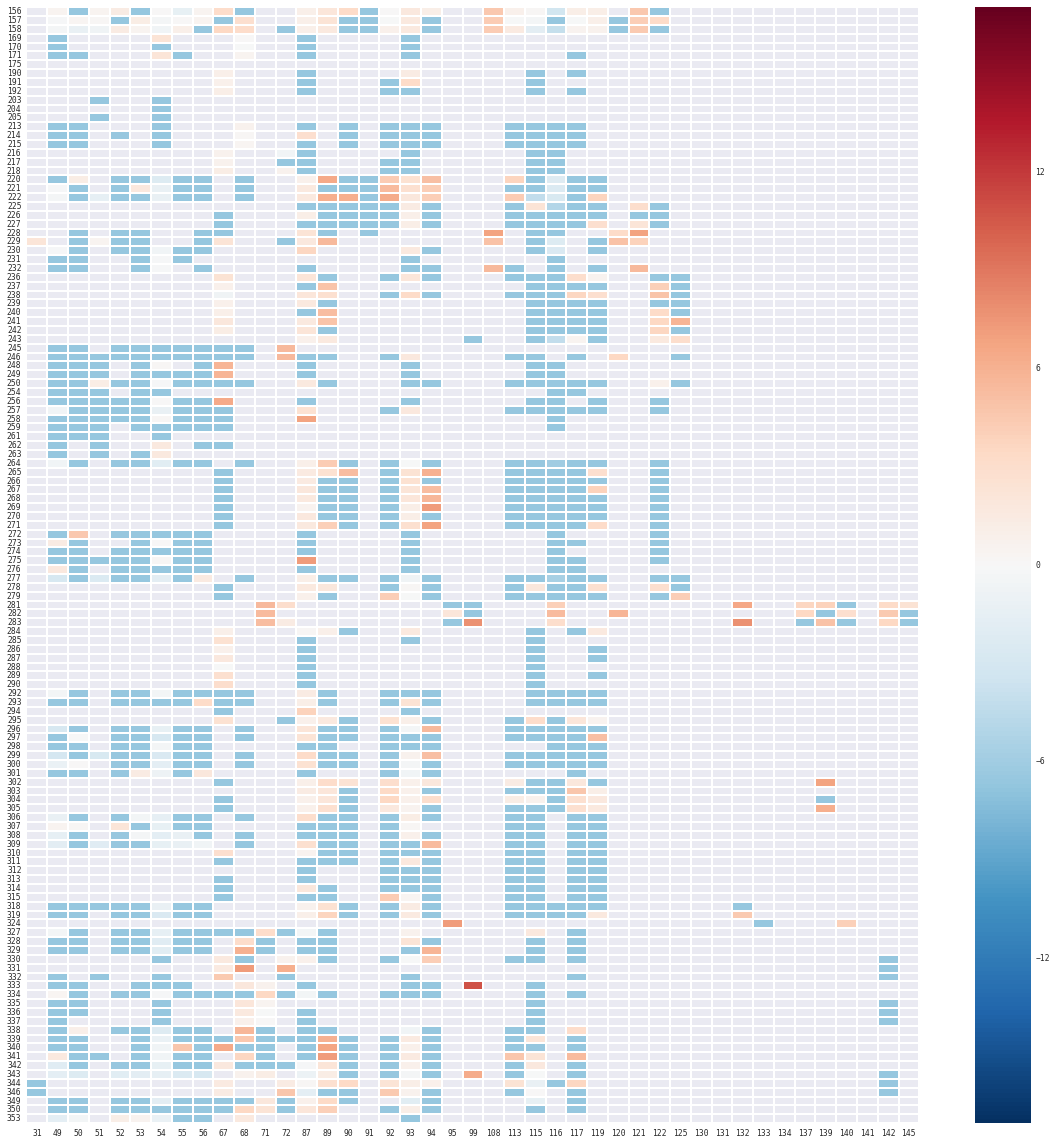

In [28]:
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(20, 20))
mask = df_show.apply(lambda x: x == 0)
sns.heatmap(df_ctr_lo, mask=mask)

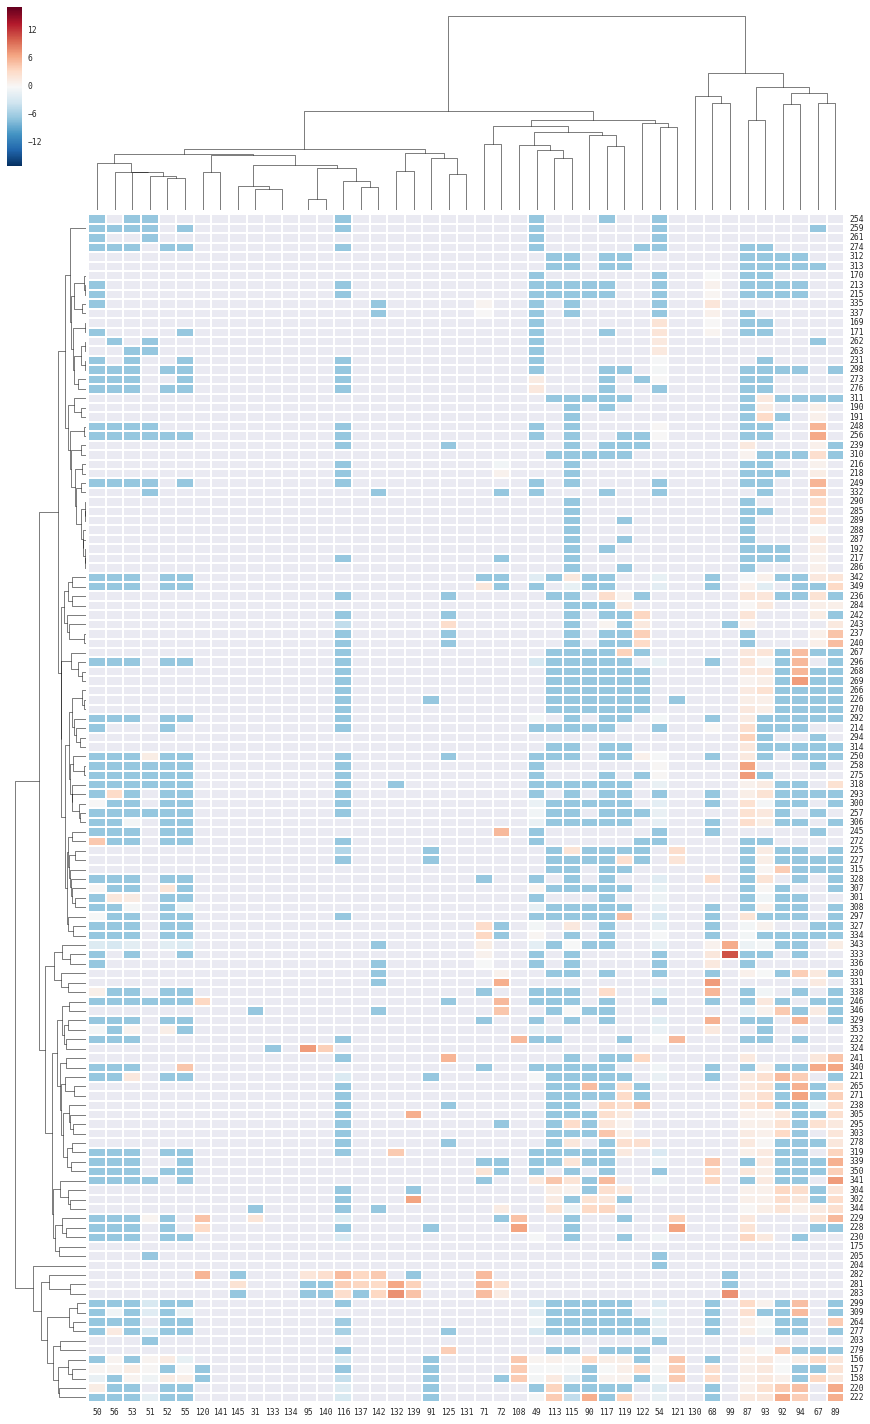

In [67]:
sns.clustermap(df_ctr_lo, figsize=(15, 25), mask=mask)

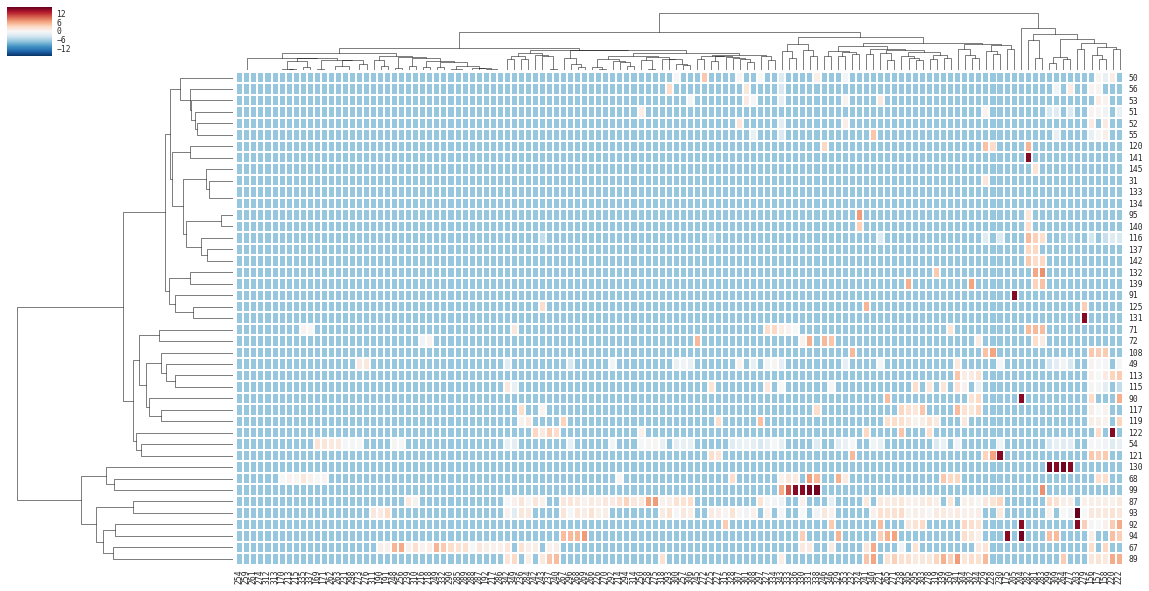

In [41]:
sns.clustermap(df_ctr_lo.T, figsize=(20, 10))

Not sure how to mask the clustered map, going to do it manually...

In [42]:
columns_c = [50,56,53,51,52,55,120,141,145,31,133,134,95,140,116,
             137,142,132,139,91,125,131,71,72,108,49,113,115,90,117,
             119,122,54,121,130,68,99,87,93,92,94,67,89]
index_c = [254,259,261,274,312,313,170,213,215,335,337,169,171,262,263,
           231,298,273,276,311,190,191,248,256,239,310,216,218,249,332,
           290,285,289,288,287,192,217,286,342,349,236,284,242,243,237,
           240,267,296,268,269,266,226,270,292,214,294,314,250,258,275,
           318,293,300,257,306,245,272,225,227,315,328,307,301,308,297,
           327,334,343,333,336,330,331,338,246,346,329,353,232,324,241,
           340,221,265,271,238,305,295,303,278,319,339,350,341,304,302,
           344,229,228,230,175,205,204,282,281,283,299,309,264,277,203,
           279,156,157,158,220,222]

In [47]:
df_show_c = pd.DataFrame(index=index_c, columns=columns_c)
df_show_c = df_show_c.fillna(0)
for col in columns_c:
    for ind in index_c:
        df_show_c.loc[ind,col] = df_show.loc[ind,col]

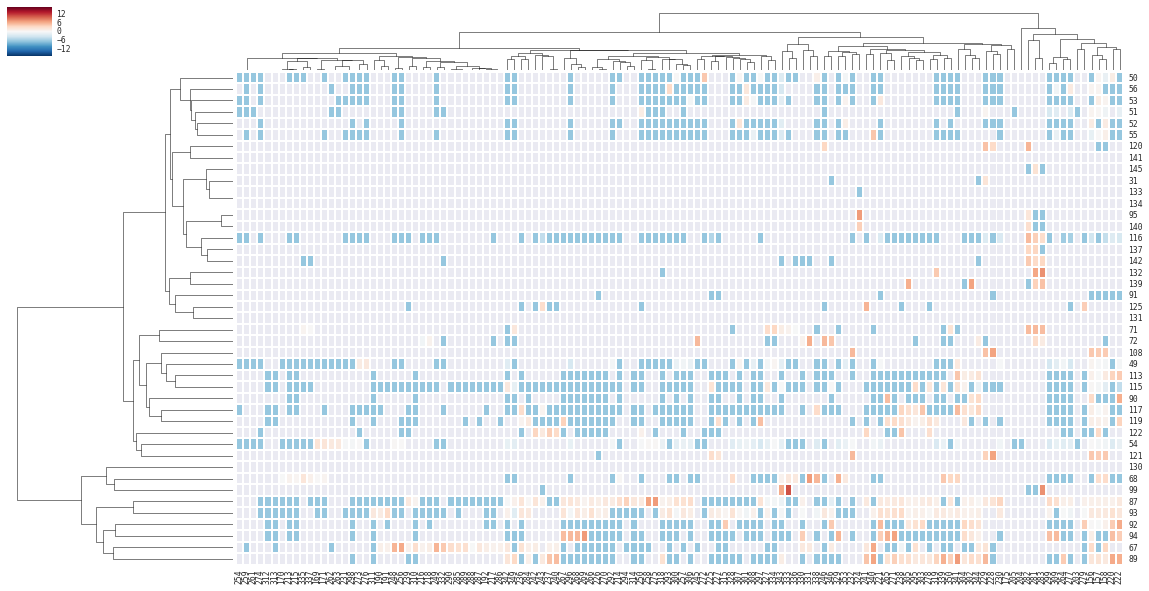

In [48]:
mask = df_show_c.apply(lambda x: x == 0)
sns.clustermap(df_ctr_lo.T, figsize=(20, 10), mask=mask.T)

Correct the margin numbers

In [51]:
df_ctr_lo.min().min()

-6.6438561897747244

In [64]:
df_ctr_lo.max().max()

17.042781890213675

In [68]:
df_ctr.min().min()

0.0

In [71]:
df_ctr.max().max()

300.0

In [72]:
1/rate

450.056741653532

In [76]:
min(0,1)

0

In [6]:
df_ctr2 = df_ctr.applymap(lambda x: min(x, 1))

In [81]:
df_ctr2.max().max()

1.0

In [7]:
df_ctr_lo2 = np.log2(df_ctr2/rate + 0.000001)

In [86]:
df_ctr_lo2.min().min()

-19.931568569324174

In [89]:
df_ctr_lo2.max().max()

8.8139630960705571

In [8]:
df_ctr_lo2 = df_ctr_lo2.applymap(lambda x: max(x, -9))

In [92]:
index_c2 = [254,259,261,274,312,313,170,213,215,335,337,169,171,262,263,
           231,298,273,276,311,190,191,248,256,239,310,216,218,249,332,
           290,285,289,288,287,192,217,286,236,284,242,237,
           240,267,296,268,269,266,226,270,214,294,314,
           300,257,306,
           292,258,275,293,318,
           245,272,328,307,301,308,
           315,225,227,342,
           327,
           349,297,250,
           334,331,338,
           343,333,336,
           246,205,
           324,353,175,329,265,271,238,295,303,305,278,319,339,350,340,241,243,
           230,228,232,299,309,264,277,330,203,346,221,
           279,282,281,283,156,157,158,229,220,222,
           341,204,304,302,344]
columns_c2 = [50,53,56,51,52,55,91,125,131,145,31,133,134,95,140,
             142,137,141,120,116,132,139,99,71,72,49,130,108,121,
             115,90,113,122,117,119,54,68,92,94,87,93,67,89]

In [93]:
df_show_c2 = pd.DataFrame(index=index_c2, columns=columns_c2)
df_show_c2 = df_show_c2.fillna(0)
for col in columns_c2:
    for ind in index_c2:
        df_show_c2.loc[ind,col] = df_show.loc[ind,col]

In [95]:
mask2 = df_show_c2.applymap(lambda x: x == 0)

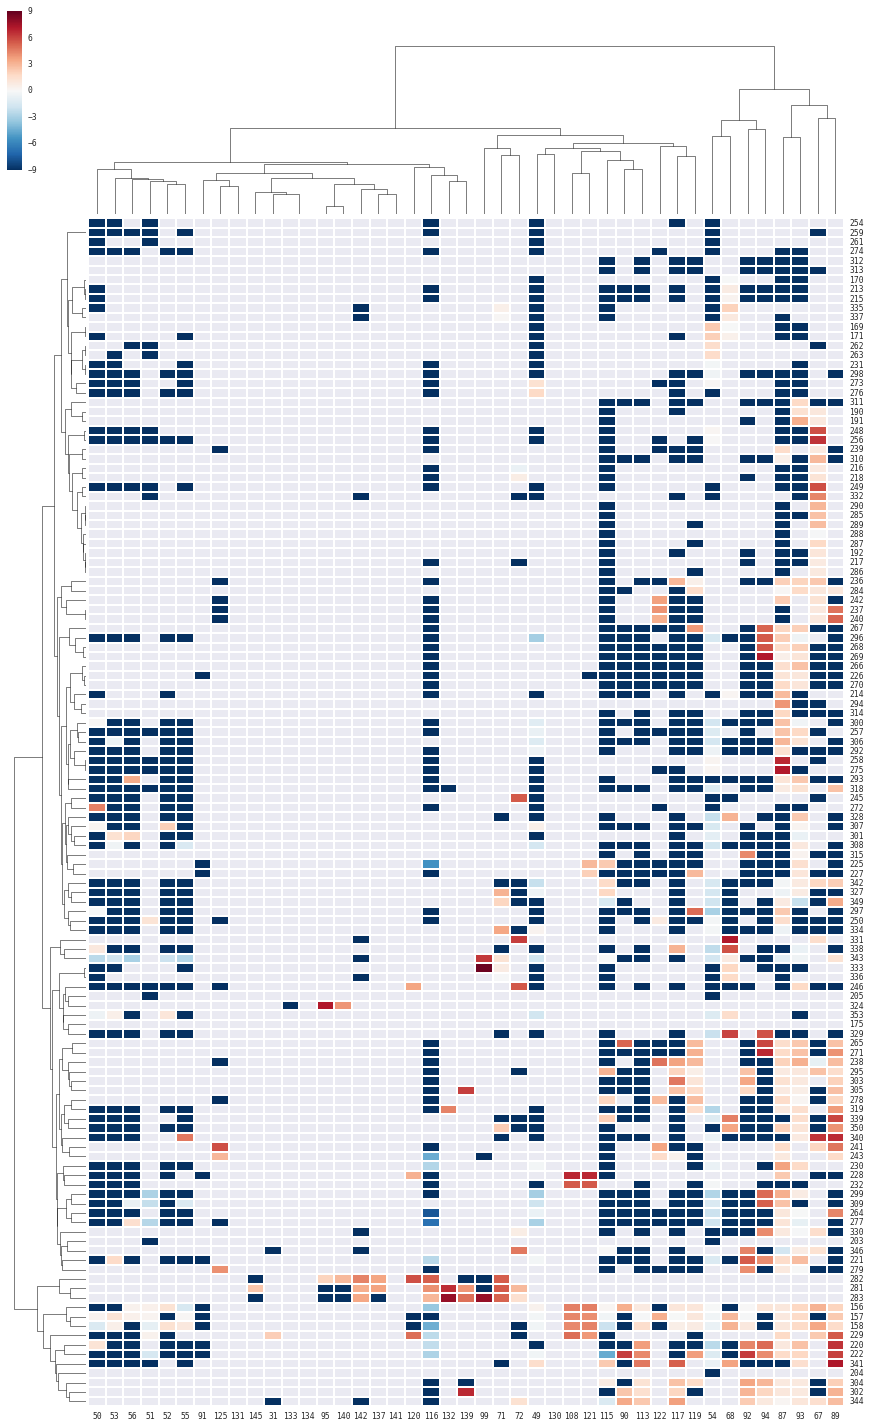

In [96]:
sns.clustermap(df_ctr_lo2, figsize=(15, 25), mask=mask2)

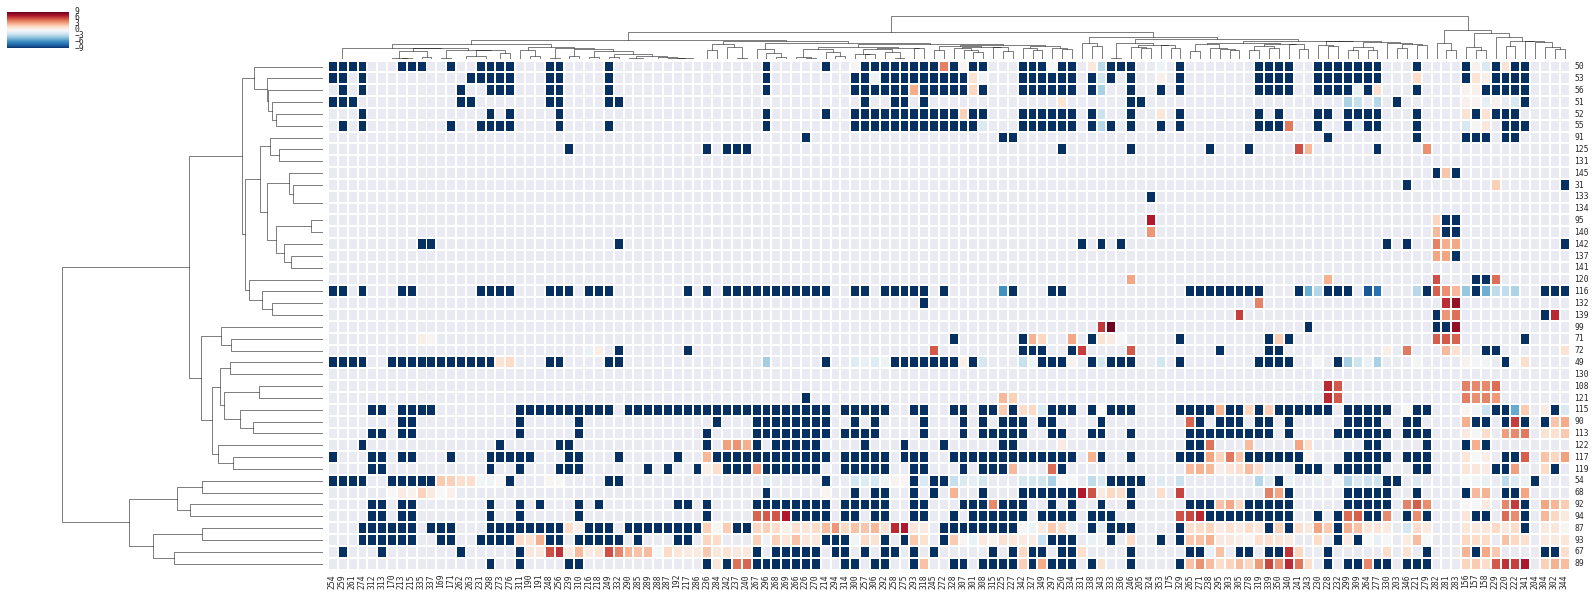

In [101]:
sns.clustermap(df_ctr_lo2.T, figsize=(28, 10), mask=mask2.T)

In [106]:
df_show.loc[302,116]

35

Also plot the number of impressions

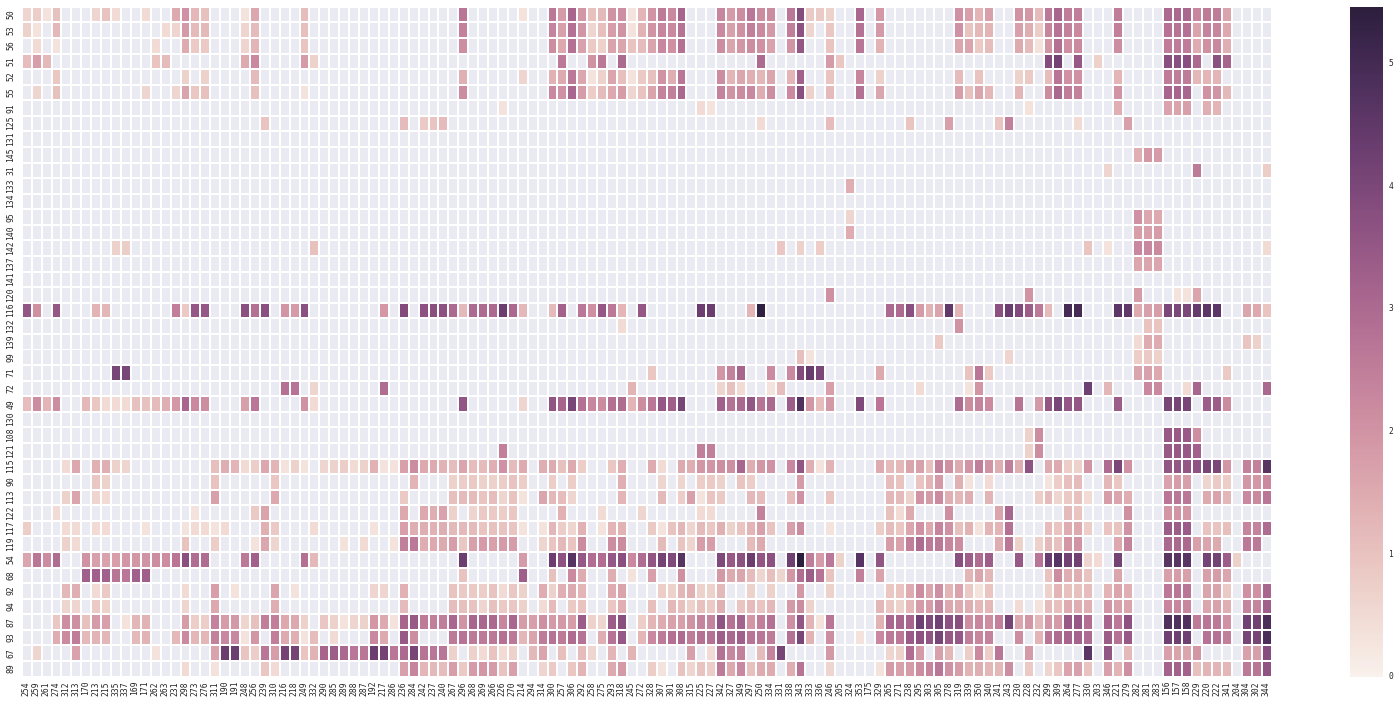

In [114]:
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(28, 12))
sns.heatmap(df_show_c2.applymap(lambda x: np.log10(x+1)).T, mask=mask2.T)

In [11]:
df_show.shape

(126, 43)

In [9]:
df_ctr_lo2

,31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,93,94,95,99,108,113,115,116,117,119,120,121,
156,-9,0.420131,-9.000000,0.470188,1.330108,-9.000000,-0.005631,-1.504587,0.421604,3.141255,-9.000000,-9,-9,0.992541,2.004760,3.290088,-9,0.062387,1.858324,1.162840,-9,-9,4.564449,0.839521,0.200887,-3.402011,1.070041,1.063076,-9,4.593262,...
157,-9,-0.269832,0.304836,0.242751,-9.000000,1.259349,-0.338457,0.092854,0.434542,-9.000000,2.906832,-9,-9,0.945371,2.322101,-9.000000,-9,-0.125644,1.706610,-9.000000,-9,-9,4.360001,-0.116802,-0.320466,-9.000000,-0.058870,1.041801,-9,4.162776,...
158,-9,-0.324052,-1.331978,-0.801273,1.379294,0.498792,-0.586460,0.927645,-9.000000,3.491674,3.141255,-9,-9,1.031585,1.621438,-9.000000,-9,0.919116,1.712963,-9.000000,-9,-9,4.355073,1.578715,-1.900281,-4.399112,0.603287,0.733133,-9,4.486959,...
169,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,2.387531,-9.000000,-9.000000,-9.000000,-0.008614,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,-9.000000,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...
170,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-0.049455,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,-9.000000,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...
171,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,2.127323,-9.000000,-9.000000,-9.000000,0.425222,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,-9.000000,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...
175,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,-9.000000,8.813963,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...
190,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.028831,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,1.379252,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...
191,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.914802,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,3.259298,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...
192,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.085334,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9,-9.000000,-9.000000,-9.000000,-9,-9,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9,-9.000000,...


Prepare ads-app matrix with NaN filled in

In [12]:
for ad in df_ctr_lo2.index:
    for app in df_ctr_lo2.columns:
        if df_show.loc[ad, app] == 0:
            df_ctr_lo2.loc[ad, app] = np.nan
df_ctr_lo2

,31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,93,94,95,99,108,113,115,116,117,119,120,121,
156,NaN,0.420131,-9.000000,0.470188,1.330108,-9.000000,-0.005631,-1.504587,0.421604,3.141255,-9.000000,NaN,NaN,0.992541,2.004760,3.290088,-9,0.062387,1.858324,1.16284,NaN,NaN,4.564449,0.839521,0.200887,-3.402011,1.070041,1.063076,NaN,4.593262,...
157,NaN,-0.269832,0.304836,0.242751,-9.000000,1.259349,-0.338457,0.092854,0.434542,-9.000000,2.906832,NaN,NaN,0.945371,2.322101,-9.000000,-9,-0.125644,1.706610,-9.00000,NaN,NaN,4.360001,-0.116802,-0.320466,-9.000000,-0.058870,1.041801,-9,4.162776,...
158,NaN,-0.324052,-1.331978,-0.801273,1.379294,0.498792,-0.586460,0.927645,-9.000000,3.491674,3.141255,NaN,-9,1.031585,1.621438,-9.000000,-9,0.919116,1.712963,-9.00000,NaN,NaN,4.355073,1.578715,-1.900281,-4.399112,0.603287,0.733133,-9,4.486959,...
169,NaN,-9.000000,NaN,NaN,NaN,NaN,2.387531,NaN,NaN,NaN,-0.008614,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
170,NaN,-9.000000,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,-0.049455,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
171,NaN,-9.000000,-9.000000,NaN,NaN,NaN,2.127323,-9.000000,NaN,NaN,0.425222,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.028831,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,1.379252,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,-9.000000,NaN,NaN,NaN,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914802,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,-9.000000,3.259298,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,NaN,NaN,...
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.085334,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,-9.000000,-9.000000,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,-9.000000,NaN,NaN,NaN,...


For now, not use no-click pairs for calculating similarity

In [27]:
df_ctr_lo3 = df_ctr_lo2.applymap(lambda x: x if x > -9 else np.nan)

In [28]:
df_ctr_lo3

,31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,93,94,95,99,108,113,115,116,117,119,120,121,
156,NaN,0.420131,NaN,0.470188,1.330108,NaN,-0.005631,-1.504587,0.421604,3.141255,NaN,NaN,NaN,0.992541,2.004760,3.290088,NaN,0.062387,1.858324,1.16284,NaN,NaN,4.564449,0.839521,0.200887,-3.402011,1.070041,1.063076,NaN,4.593262,...
157,NaN,-0.269832,0.304836,0.242751,NaN,1.259349,-0.338457,0.092854,0.434542,NaN,2.906832,NaN,NaN,0.945371,2.322101,NaN,NaN,-0.125644,1.706610,NaN,NaN,NaN,4.360001,-0.116802,-0.320466,NaN,-0.058870,1.041801,NaN,4.162776,...
158,NaN,-0.324052,-1.331978,-0.801273,1.379294,0.498792,-0.586460,0.927645,NaN,3.491674,3.141255,NaN,NaN,1.031585,1.621438,NaN,NaN,0.919116,1.712963,NaN,NaN,NaN,4.355073,1.578715,-1.900281,-4.399112,0.603287,0.733133,NaN,4.486959,...
169,NaN,NaN,NaN,NaN,NaN,NaN,2.387531,NaN,NaN,NaN,-0.008614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
171,NaN,NaN,NaN,NaN,NaN,NaN,2.127323,NaN,NaN,NaN,0.425222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.028831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.379252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.259298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.085334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...


In [29]:
df_ctr_lo3[['49','50']].dropna().shape

(6, 2)

In [30]:
sklearn.metrics.pairwise.cosine_similarity(df_ctr_lo3[['49','50']].dropna()['49'],df_ctr_lo3[['49','50']].dropna()['50'])[0][0]

0.67862256245296593

In [31]:
scipy.spatial.distance.euclidean(df_ctr_lo3[['49','50']].dropna()['49'],df_ctr_lo3[['49','50']].dropna()['50'])

2.222919298438998

In [52]:
math.isnan(df_ctr_lo3['49'].iloc[4])

True

In [60]:
type(df_ctr_lo3['49'].loc[[156, 157]])

pandas.core.series.Series

In [61]:
def get_share_items(x, y):
    share = []
    for i in x.index:
        if not math.isnan(x.loc[i]) and i in y.index and not math.isnan(y.loc[i]):
            share.append(i)
    return share

In [86]:
def sim_distance(x, y):
    share = get_share_items(x, y)
    
    #return 0 iff shared item number < 2
    if len(share) < 1:
        return 0
    
    #Add up the squares of all differences
    sum_of_squares = sum([pow(x.loc[i]-y.loc[i],2) for i in share])
    
    return 1 / (1 + sum_of_squares)

In [87]:
sim_distance(df_ctr_lo3['49'],df_ctr_lo3['50'])

0.16831134319136012

In [64]:
df_ctr_lo3['49'].sum()

-17.877494297338146

In [65]:
def sim_pearson(x, y):
    share = get_share_items(x, y)
    
    #return 0 iff shared item number < 2
    if len(share) < 2:
        return 0
    
    #length of shared items
    n = len(share)
    
    sum_x = x.loc[share].sum()
    sum_y = y.loc[share].sum()
    sum_square_x = sum([pow(x.loc[i], 2) for i in share])
    sum_square_y = sum([pow(y.loc[i], 2) for i in share])
    sum_x_y = sum([x.loc[i] * y.loc[i] for i in share])
    
    #Calculate Pearson score (r)
    num = sum_x_y - (sum_x * sum_y / n)
    den = math.sqrt((sum_square_x - pow(sum_x,2)/n) * (sum_square_y - pow(sum_y,2)/n))
    
    if den == 0:
        return 0
    else:
        return num/den

In [66]:
sim_pearson(df_ctr_lo3['49'],df_ctr_lo3['50'])

0.51605789438863447

In [88]:
def sim_euclidean(x, y):
    share = get_share_items(x, y)
    
    #return 0 iff shared item number < 2
    if len(share) < 1:
        return 0
        
    return math.sqrt(sum([pow(x.loc[i]-y.loc[i],2) for i in share]))

In [68]:
sim_euclidean(df_ctr_lo3['49'],df_ctr_lo3['50'])

2.222919298438998

In [70]:
type(df_ctr_lo3[['49','50']].dropna()['49'])

pandas.core.series.Series

In [73]:
def sim_cosine(x, y):
    share = get_share_items(x, y)
    
    #return 0 iff shared item number < 2
    if len(share) < 2:
        return 0
    
    return sklearn.metrics.pairwise.cosine_similarity(x.loc[share], y.loc[share])[0][0]

In [74]:
sim_cosine(df_ctr_lo3['49'],df_ctr_lo3['50'])

0.67862256245296593

In [75]:
def share_len(x, y):
    share = get_share_items(x, y)

    return len(share)

In [82]:
def cal_distances(df):
    result = []
    for app1 in df.columns:
        for app2 in df.columns:
            if app1 == app2:
                continue
            share = share_len(df[app1], df[app2])
            eu = sim_euclidean(df[app1], df[app2])
            dis = sim_distance(df[app1], df[app2])
            cos = sim_cosine(df[app1], df[app2])
            r = sim_pearson(df[app1], df[app2])
            result.append({'app1': app1,
                           'app2': app2,
                           'common': share,
                           'euclidean': eu,
                           'distance': dis,
                           'cosine': cos,
                           'pearson': r})
    out_df = pd.DataFrame([datum for datum in result],
                          columns = ['app1','app2','common','euclidean','distance','cosine','pearson'])
    return out_df

In [83]:
cal_distances(df_ctr_lo3[['49','50']])

,app1,app2,common,euclidean,distance,cosine,pearson
0,49,50,6,2.222919,0.168311,0.678623,0.516058
1,50,49,6,2.222919,0.168311,0.678623,0.516058


In [89]:
df_ctr_dist = cal_distances(df_ctr_lo3)

In [90]:
df_ctr_dist

,app1,app2,common,euclidean,distance,cosine,pearson
0,31,49,0,0.000000,0.000000,0,0
1,31,50,0,0.000000,0.000000,0,0
2,31,51,1,1.787568,0.238356,0,0
3,31,52,0,0.000000,0.000000,0,0
4,31,53,0,0.000000,0.000000,0,0
5,31,54,0,0.000000,0.000000,0,0
6,31,55,0,0.000000,0.000000,0,0
7,31,56,0,0.000000,0.000000,0,0
8,31,67,1,0.122733,0.985160,0,0
9,31,68,0,0.000000,0.000000,0,0


In [91]:
df_ctr_dist.shape

(1806, 7)

In [92]:
df_ctr_dist2 = df_ctr_dist[['common','euclidean','distance','cosine','pearson']]

In [93]:
df_ctr_dist2.index = pd.MultiIndex.from_arrays(df_ctr_dist[['app1','app2']].values.T)

In [94]:
df_ctr_dist2.shape

(1806, 5)

In [95]:
df_ctr_dist2

common  euclidean  distance  cosine  pearson
31 49       0   0.000000  0.000000       0        0
   50       0   0.000000  0.000000       0        0
   51       1   1.787568  0.238356       0        0
   52       0   0.000000  0.000000       0        0
   53       0   0.000000  0.000000       0        0
   54       0   0.000000  0.000000       0        0
   55       0   0.000000  0.000000       0        0
   56       0   0.000000  0.000000       0        0
   67       1   0.122733  0.985160       0        0
   68       0   0.000000  0.000000       0        0
          ...        ...       ...     ...      ...

[1806 rows x 5 columns]

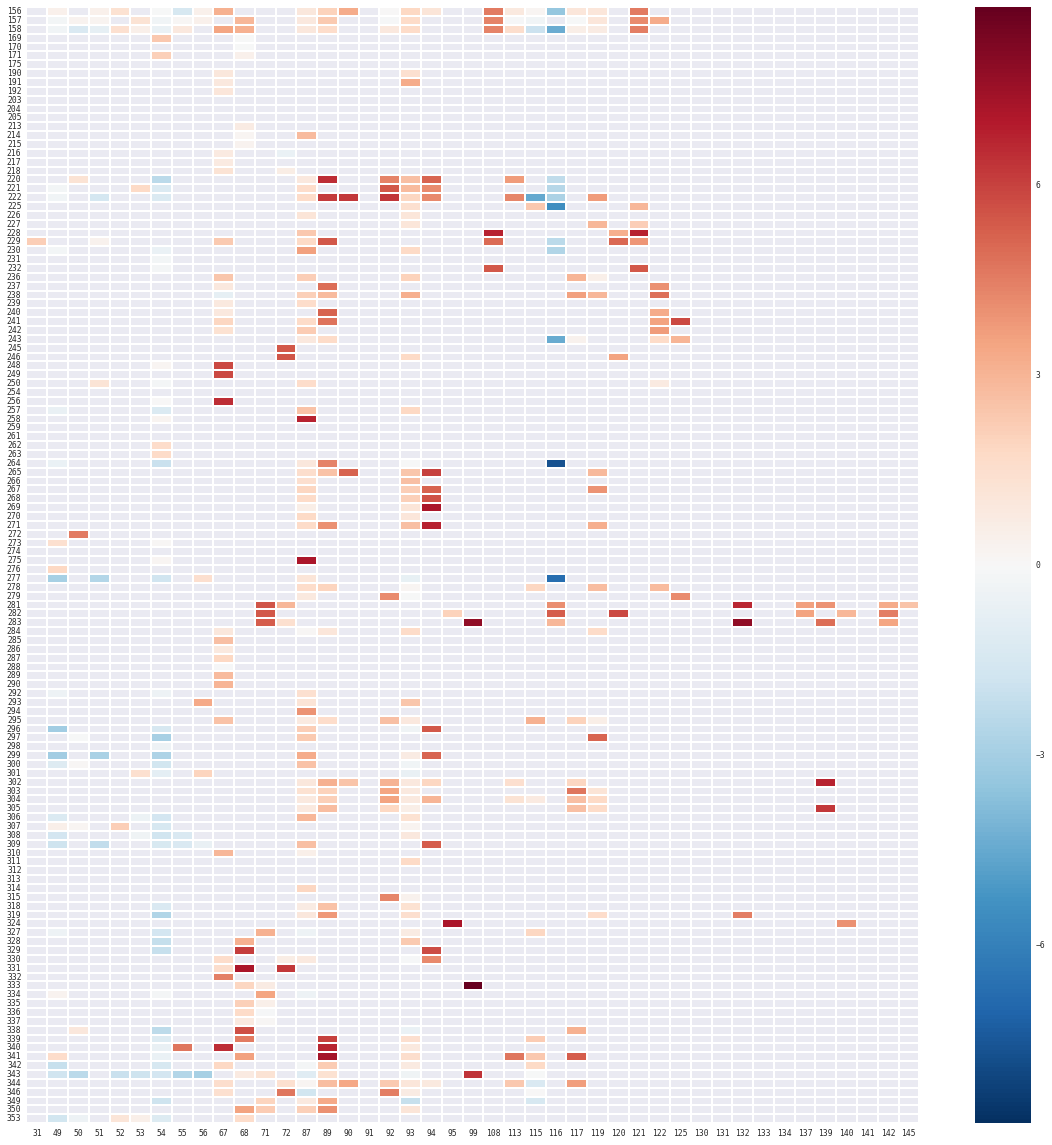

In [114]:
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(20, 20))
mask = df_ctr_lo3.applymap(lambda x: math.isnan(x))
sns.heatmap(df_ctr_lo3, mask=mask)

In [176]:
df_ctr_dist2.loc['108','121']['cosine']

0.99649783871180664

In [106]:
df_ctr_lo3.loc[156, '49']

0.42013084615501251

In [123]:
def cal_scores(df, sm, similarity='cosine'):
    result = pd.DataFrame(index=df.index, columns=df.columns)
    
    for app in df.columns:
        for ad in df.index:
            score = 0
            weight = 0
            for other in df.columns:
                # skip when compare to itself
                if other == app:
                    continue
                
                pre = df.loc[ad, other]
                
                # continue if no previous score exists
                if not math.isnan(pre):
                    
                    # calculated new distance weighted scores
                    dist = sm.loc[app, other][similarity]
                    weight += dist
                    score += dist * df.loc[ad, other]
                    
            # normalize by the sum of weights
            val = 0
            if not weight == 0:
                val = score / weight
                
            result.loc[ad, app] = val
    
    return result

In [120]:
app = '87'
ad = 283
weight = 0
score = 0
for other in df_ctr_lo3.columns:
    if other == app:
        continue
    dist = df_ctr_dist2.loc[app, other]['cosine']
    pre = df_ctr_lo3.loc[ad, other]
    if not math.isnan(pre):
        weight += dist
        score += dist * df_ctr_lo3.loc[ad, other]

In [122]:
weight

-0.32949281985562129

In [134]:
df_ctr_lo_recal = cal_scores(df=df_ctr_lo2,sm=df_ctr_dist2)

In [135]:
df_ctr_lo_recal

,31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,93,94,95,99,108,113,115,116,117,119,120,121,
156,0,-5.473961,-1.639362,13.76449,0.5515675,0.6592183,0.5986603,-3.296219,-0.2492817,0.9876178,1.735245,-3.782054,0.1924366,0.4086683,0.1288724,2.848013,0,0.2147563,0.127233,7.189545,0,-9,0.8542809,1.060551,14.19557,2.02359,0.2910441,-0.1432303,2.449633,0.8403728,...
157,0,0.5016182,-1.536049,-7.841408,1.501936,1.262833,0.1478181,-0.8386895,2.897774,0.167248,0.3370049,-1.599,-6.318817,-1.330365,-0.2837411,-0.4967454,0,-1.307353,-0.435748,-0.7457408,0,2.906832,-0.308291,-1.096162,-13.1309,-1.850552,-0.3608162,-0.3753272,1.501332,-0.3551993,...
158,0,0.3318424,-2.49861,-1.781533,1.773775,1.202919,-0.4845819,0.6234654,3.64673,-0.3949722,2.400824,-2.633705,-1.597776,-0.7015355,0.07207251,1.943466,0,-0.1471223,-1.247903,3.004843,0,3.141255,0.8958362,0.1400337,-4.673162,1.127614,-0.6311426,-0.8989816,2.235714,0.7920484,...
169,0,132.0106,-9.425298,2.708649,-8.217425,-6.848401,-1.584209,-5.383623,-8.966659,-6.818478,-22.45114,-329.5204,-9,-7.964261,-9.394365,-20.48974,0,-17.58419,-7.895718,112.8419,0,-0.008614253,-8.931154,-10.17073,-0.2532452,24.22627,-9.301728,-9.827938,-9,-8.943419,...
170,0,-10.19907,-9.101663,-17.74846,-7.059325,-6.578837,-1.617893,-8.254494,-9.997407,-3.182375,-9,2812.294,-9,18.28602,-4.152041,-9,0,1.94802,-1.24644,-9,0,-0.04945512,-4.642953,-5.734819,-0.3633981,-9,-6.265095,-2.845002,-9,-4.610108,...
171,0,-5.437691,-9.206207,-5.900923,-8.497486,-7.889042,-3.839632,-5.893855,-9.011517,-7.788664,-14.34497,-120.6857,-9,-8.480833,-9.019807,-14.51619,0,-10.63278,-8.270977,152.1342,0,0.4252221,-8.632222,-9.554013,-5.037262,-71.31367,-9.1021,-9.28207,-9,-8.639402,...
175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
190,0,177.1012,-7.642043,-99.08728,-3.635877,-3.343379,-4.647403,-122.0636,-6.024212,-5.844834,-4.473455,-8.146714,17.98127,-2.097003,-4.368468,-2.281601,0,-3.52537,-6.39512,-2.953654,0,0,-2.56309,-3.603345,-3.219525,-3.798829,-3.9549,-4.26685,-9,-3.447596,...
191,0,-6.177436,-7.504819,-5.482496,-2.900664,-4.741571,-4.675552,1.263966,0.4094989,-5.424413,-3.864106,-7.992154,2.440991,-0.6003599,-4.022805,-1.682881,0,0.5346196,-6.480633,-2.692629,0,0,-1.405195,-3.09306,-18.78012,-3.103237,-4.964582,-3.810619,-9,-2.547969,...
192,0,-3.571982,-9,-8.208174,-6.44624,-9,-7.714445,10.30012,-9,-9,-7.079237,-9,-4.365757,-6.694598,-7.141855,-6.514604,0,-6.574586,-7.074391,-7.027889,0,0,-6.308822,-7.008542,2.665202,-6.223595,-7.435272,-7.955664,-9,-6.614096,...


In [136]:
df_ctr_lo_recal2 = df_ctr_lo_recal.applymap(lambda x: min(x, 10))
df_ctr_lo_recal2 = df_ctr_lo_recal2.applymap(lambda x: max(x, -10))

In [141]:
df_new = [item for sublist in df_ctr_lo_recal.values for item in sublist]

In [142]:
df_new2 = [item for sublist in df_ctr_lo_recal2.values for item in sublist]

In [138]:
df_old = [item for sublist in df_ctr_lo2.values for item in sublist]

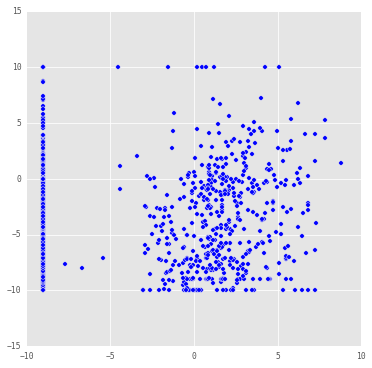

In [166]:
bol = [not math.isnan(x) for x in df_old]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(list(compress(df_old, bol)),list(compress(df_new2, bol)))

Accuracy without considering the absolute value?

In [232]:
d1 = [x > 0 for x in list(compress(df_old, bol))]
d2 = [x > 0 for x in list(compress(df_new2, bol))]
float(sum([d1[i] == d2[i] for i in range(len(d1))]))/len(d1)

0.7423352902804957

In [235]:
def error_analysis(predict, reality):
    accuracy = float(sum([predict[i] == reality[i] for i in range(len(predict))]))/len(reality) * 100
    precision = float(sum([reality[i] and predict[i] == reality[i] for i in range(len(predict))]))/sum(predict) * 100
    recall = float(sum([reality[i] and predict[i] == reality[i] for i in range(len(predict))]))/sum(reality) * 100
    f1score = 2*precision*recall/(precision + recall)/100
    print 'accuracy:%.2f\nprecision:%.2f\nrecall:%.2f\nF1 score:%.2f' % (accuracy, precision, recall, f1score)

In [238]:
error_analysis(d2, d1)

accuracy:74.23
precision:48.02
recall:25.06
F1 score:0.33


In [165]:
bol = [not math.isnan(x) for x in df_old]
len(list(compress(df_old, bol)))

1533

In [151]:
len(df_old)

5418

What is I use the full list to calculate the distance?

In [167]:
df_ctr_dist_new = cal_distances(df_ctr_lo2)

In [168]:
df_ctr_dist_new2 = df_ctr_dist_new[['common','euclidean','distance','cosine','pearson']]
df_ctr_dist_new2.index = pd.MultiIndex.from_arrays(df_ctr_dist_new[['app1','app2']].values.T)

In [169]:
df_ctr_lo_recal_new = cal_scores(df=df_ctr_lo2,sm=df_ctr_dist_new2)

In [170]:
df_ctr_lo_recal_new2 = df_ctr_lo_recal_new.applymap(lambda x: min(x, 10))
df_ctr_lo_recal_new2 = df_ctr_lo_recal_new2.applymap(lambda x: max(x, -10))

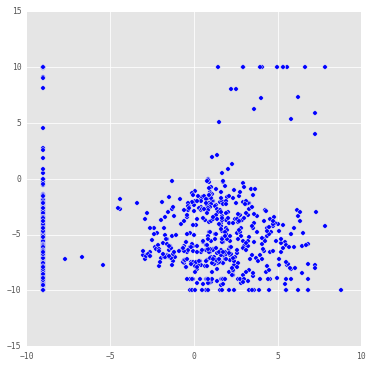

In [239]:
new = [item for sublist in df_ctr_lo_recal_new2.values for item in sublist]
old = [item for sublist in df_ctr_lo2.values for item in sublist]
bol = [not math.isnan(x) for x in old]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(list(compress(old, bol)),list(compress(new, bol)))

In [240]:
d1 = [x > 0 for x in list(compress(old, bol))]
d2 = [x > 0 for x in list(compress(new, bol))]
error_analysis(d2, d1)

accuracy:75.28
precision:59.52
recall:6.46
F1 score:0.12


Well the precision and recall are not very high...

In [172]:
sim_pearson(pd.Series(old), pd.Series(new))

0.27514538439920977

In [173]:
sim_pearson(pd.Series(df_old), pd.Series(df_new2))

0.23789806019485635

In [174]:
sim_pearson(pd.Series(list(compress(old, bol))), pd.Series(list(compress(new, bol))))

0.27514538439920977

Pearson correlation ~0.3

Maybe I shouldn't hope the new scores to be correlated very well with the old scores...

In [188]:
df_ctr_lo2['49'][[156,157]]

156    0.420131
157   -0.269832
Name: 49, dtype: float64

In [246]:
inds = []
for i in df_ctr_lo2.index:
    if math.isnan(df_ctr_lo2['72'][i]):
        inds.append(i)
newd = df_ctr_lo_recal2['72'][inds]
newd[newd > 0]
#sum(newd > 0)

156     0.192437
190    10.000000
191     2.440991
...
315    0.681553
336    0.726989
337    0.951156
Name: 72, Length: 16, dtype: float64

In [216]:
def ads_recommendation(df_old, df_new, app):
    
    #separate indices without record in the old file
    indList = []
    for i in df_old.index:
        if math.isnan(df_old[app][i]):
            indList.append(i)
    
    #extract the predicted scores
    new = df_new[app][indList]
    return new[new > 0]

In [252]:
ads_recommendation(df_old=df_ctr_lo2,df_new=df_ctr_lo_recal2,app='72')[222]

3.127448612495904

In [244]:
print '67: ', ads_recommendation(df_old=df_ctr_lo2,df_new=df_ctr_lo_recal2,app='67').index.values

67:  [222 243 281 282 283 335 336 337]


In [245]:
for app in df_ctr_lo2.columns:
    print app, ads_recommendation(df_old=df_ctr_lo2,df_new=df_ctr_lo_recal2,app=app).index.values

31 []
49 [190 216 243 265 267 268 269 271 278 279 281 282 283 284 295 302 303 304
 330 331 344 346]
50 [281 282 283 304 331 344]
51 [169 213 214 215 220 232 265 267 271 281 282 283 284 293 294 302 304 319
 327 331 344 350]
52 [236 238 241 243 281 282 283 295 302 303 304 305 331 335 344]
53 [236 238 265 267 271 281 282 283 284 295 302 303 304 305 331 344]
54 [228 229 241 282 302 304 331 344]
55 [191 192 216 227 237 238 239 240 241 242 279 281 282 283 284 285 288 290
 295 305 314 331 344 346]
56 [191 227 236 238 265 266 267 270 271 278 281 282 283 295 303 304 305 331]
67 [222 243 281 282 283 335 336 337]
68 [262 263 283 295 304 332 344]
71 [170 245 294 319 331]
72 [156 190 191 220 221 222 237 240 243 282 284 285 307 315 336 337]
87 [281 331]
89 [249 262 281 283 331 335]
90 [228 229 238 241 243 256 262 275 281 282 283 290 331 332 353]
91 []
92 [170 243 281 283 331 332]
93 [263 281 283 331 335]
94 [169 171 228 229 241 243 246 257 273 281 282 283 290 331 332]
95 []
99 [157 158 171 213 214 2

In [258]:
columns = [31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,
           93,94,95,99,108,113,115,116,117,119,120,121,122,125,130,131,132,133,
           134,137,139,140,141,142,145]
index = [156, 157, 158, 169, 170, 171, 175, 190, 191, 192, 203, 204,
         205, 213, 214, 215, 216, 217, 218, 220, 221, 222, 225, 226, 227,
         228, 229, 230, 231, 232, 236, 237, 238, 239, 240, 241, 242, 243,
         245, 246, 248, 249, 250, 254, 256, 257, 258, 259, 261, 262, 263,
         264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
         277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
         292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
         305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 318, 319,
         324, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
         339, 340, 341, 342, 343, 344, 346, 349, 350, 353]
df_android_m5 = pd.DataFrame(index=index, columns=columns)
df_android_m5 = df_android_m5.fillna(0)
df_ios_m5 = pd.DataFrame(index=index, columns=columns)
df_ios_m5 = df_ios_m5.fillna(0)
for col in columns:
    for ind in index:
        df_android_m5.loc[ind,col] = es.count(index="events-2015.05.*", body={'query': {'bool': {'must':[{'match': { 'ai' : col }}, {'match': { 'cr' : ind }}, {'match': { 'plfm' : 'android' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']
        df_ios_m5.loc[ind,col] = es.count(index="events-2015.05.*", body={'query': {'bool': {'must':[{'match': { 'ai' : col }}, {'match': { 'cr' : ind }}, {'match': { 'plfm' : 'ios' }}], 'must_not':[{'match': { 'fr' : 'true' }}]}}})['count']        

In [259]:
df_android_m5.to_csv("../data/df_android_count_m5_150622.tab",sep='\t')
df_ios_m5.to_csv("../data/df_ios_count_m5_150622.tab",sep='\t')

In [260]:
df_android_m5

,31,49,50,51,52,53,54,55,56,67,68,71,72,87,89,90,91,92,93,94,95,99,108,113,115,116,117,119,120,121,
156,0,0,0,0,0,0,0,0,0,153,0,0,0,11947,883,60,4,383,21190,203,0,0,5611,245,1273,4183,1332,1084,4,5814,...
157,0,0,0,0,0,0,0,0,0,143,0,0,0,12083,948,60,4,430,21510,190,0,0,5379,214,1266,4278,1129,1082,6,5620,...
158,0,0,0,0,0,0,0,0,0,142,0,0,6,12202,1009,56,0,377,21120,201,0,0,5373,204,1278,4150,1264,1037,7,5833,...
169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
190,0,0,0,0,0,0,0,0,0,39260,0,0,0,57,0,0,0,0,226,0,0,0,0,0,27,0,0,0,0,0,...
191,0,0,0,0,0,0,0,0,0,39144,0,0,0,115,0,0,0,0,237,0,0,0,0,0,14,0,0,0,0,0,...
192,0,0,0,0,0,0,0,0,0,39300,0,0,0,77,0,0,0,0,250,0,0,0,0,0,18,0,0,0,0,0,...
